In [1]:
# Import packages
import importlib
import os
import time
import numpy as np
import gc
import mosa
from paretoset import paretoset
import matplotlib.pyplot as plt

In [2]:
# -------------- PART 0a: CHOOSE CIRCUIT AND SET UP FOLDER --------------                            #<--------- SAME AS CODE1 UP TO...

# Choose circuit
circuit = input("Please enter name of the circuit: ")

# Import circuit config file
config = importlib.import_module(circuit)

# Define subfolder name to work in
folder_name = f"MOSA_{circuit}"

# Create folder if not yet exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Jump to folder
os.chdir(folder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")   

Current working directory: /home/DREXEL/nt625/Desktop/NAM/WTFFFF/MOSA_arneg


In [3]:
# -------------- PART 0d: CHOOSE SENSITIVITY FUNCTIONS --------------                                #<--------- SAME AS CODE1 UP TO...

# Print prompt
print("""
Only two sensitivity functions are present:
0. |S_alpha_xss|
1. |S_n_xss|
MOSA will anneal this pair.
""")

# Choose pair of functions
choice1 = 0
choice2 = 1

# List of sensitivity function names
sensitivity_labels = [
    "|S_alpha_xss|",
    "|S_n_xss|"]

# Save function names for later use
label1 = sensitivity_labels[choice1]
label2 = sensitivity_labels[choice2]


# -------------- PART 0e: CHANGING DIRECTORIES --------------


# Define subfolder name to work in
subfolder_name = f"MOSA_sensfuncs_{choice1}_and_{choice2}"

# Create folder if not yet exist
if not os.path.exists(subfolder_name):
    os.makedirs(subfolder_name)

# Jump to folder
os.chdir(subfolder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")                                                   #<--------- ...UP TO HERE


Only two sensitivity functions are present:
0. |S_alpha_xss|
1. |S_n_xss|
MOSA will anneal this pair.

Current working directory: /home/DREXEL/nt625/Desktop/NAM/WTFFFF/MOSA_arneg/MOSA_sensfuncs_0_and_1


In [4]:
# -------------------- NEW STUFF --------------------

In [5]:
runs = int(input("How many MOSA runs did you run: "))

In [6]:
runs

50

In [7]:
# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto front
    pareto_Salpha = np.load(f"pareto_Salpha_run{run}.npy", allow_pickle=True)
    pareto_Sn = np.load(f"pareto_Sn_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_Salpha, pareto_Sn))

    # There may be NaNs in the array. Pareto minimisation will think NaNs are minimum. We don't want this. Let's replace NaNs with infinities.
    pareto_front = np.where(np.isnan(pareto_front), np.inf, pareto_front)

    # Compute mask
    mask = paretoset(pareto_front, sense=["min", "min"])

    print(f"Run: {run}")
    if sum(mask) == len(pareto_Salpha):
        print("is good")

Run: 1
is good
Run: 2
is good
Run: 3
is good
Run: 4
is good
Run: 5
is good
Run: 6
is good
Run: 7
is good
Run: 8
is good
Run: 9
is good
Run: 10
is good
Run: 11
is good
Run: 12
is good
Run: 13
is good
Run: 14
is good
Run: 15
is good
Run: 16
is good
Run: 17
is good
Run: 18
is good
Run: 19
is good
Run: 20
is good
Run: 21
is good
Run: 22
is good
Run: 23
is good
Run: 24
is good
Run: 25
is good
Run: 26
is good
Run: 27
is good
Run: 28
is good
Run: 29
is good
Run: 30
is good
Run: 31
is good
Run: 32
is good
Run: 33
is good
Run: 34
is good
Run: 35
is good
Run: 36
is good
Run: 37
is good
Run: 38
is good
Run: 39
is good
Run: 40
is good
Run: 41
is good
Run: 42
is good
Run: 43
is good
Run: 44
is good
Run: 45
is good
Run: 46
is good
Run: 47
is good
Run: 48
is good
Run: 49
is good
Run: 50
is good


In [8]:
# Initialize an empty array for storing Pareto front values
total_paretofront = np.empty((0, 2))

# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto front
    pareto_Salpha = np.load(f"pareto_Salpha_run{run}.npy", allow_pickle=True)
    pareto_Sn = np.load(f"pareto_Sn_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_Salpha, pareto_Sn))

    # Append to the total Pareto front
    total_paretofront = np.vstack((total_paretofront, pareto_front))

# Now, total_paretofront contains all runs stacked together
np.shape(total_paretofront)

(16286, 2)

In [9]:
mask2 = paretoset(total_paretofront, sense=["min", "min"])
filtered_total_paretofront = total_paretofront[mask2]

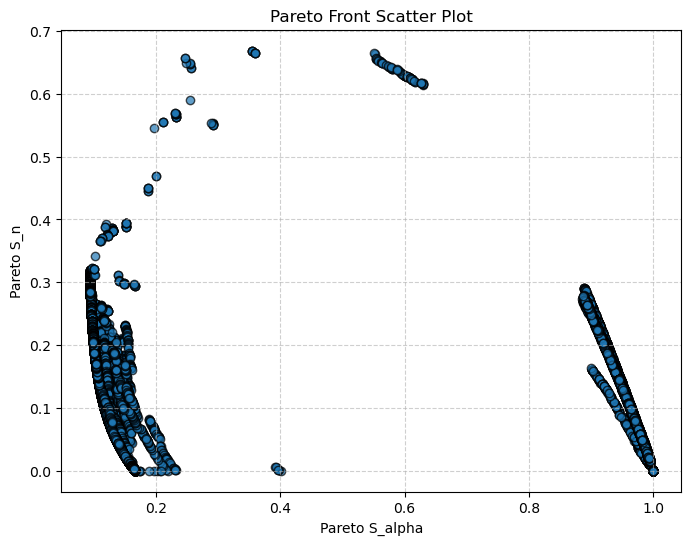

In [10]:
# Extract columns
x = total_paretofront[:, 0]  # First column
y = total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

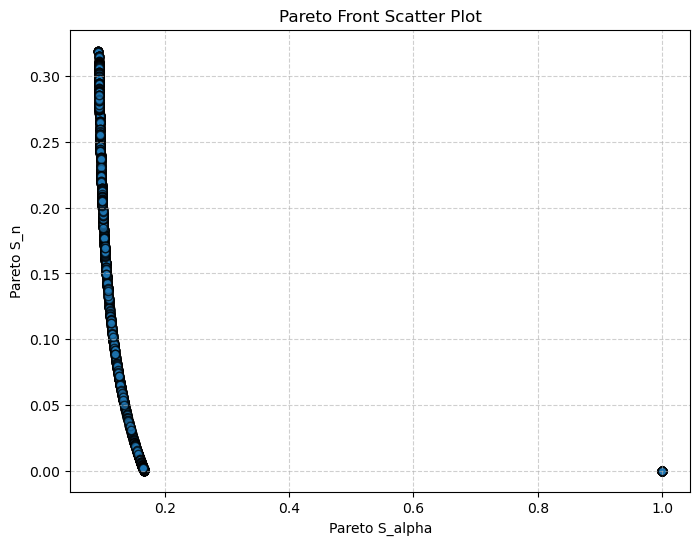

In [11]:
# Extract columns
x_50runs = filtered_total_paretofront[:, 0]  # First column
y_50runs = filtered_total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_50runs, y_50runs, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

5 runs

In [12]:
# Initialize an empty array for storing Pareto front values
total_paretofront = np.empty((0, 2))

# Loop through runs
for run in range(1, 5 + 1):
    # Load the parameter values for that run's Pareto front
    pareto_Salpha = np.load(f"pareto_Salpha_run{run}.npy", allow_pickle=True)
    pareto_Sn = np.load(f"pareto_Sn_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_Salpha, pareto_Sn))

    # Append to the total Pareto front
    total_paretofront = np.vstack((total_paretofront, pareto_front))

# Now, total_paretofront contains all runs stacked together
np.shape(total_paretofront)

(1649, 2)

In [13]:
mask2 = paretoset(total_paretofront, sense=["min", "min"])
filtered_total_paretofront = total_paretofront[mask2]

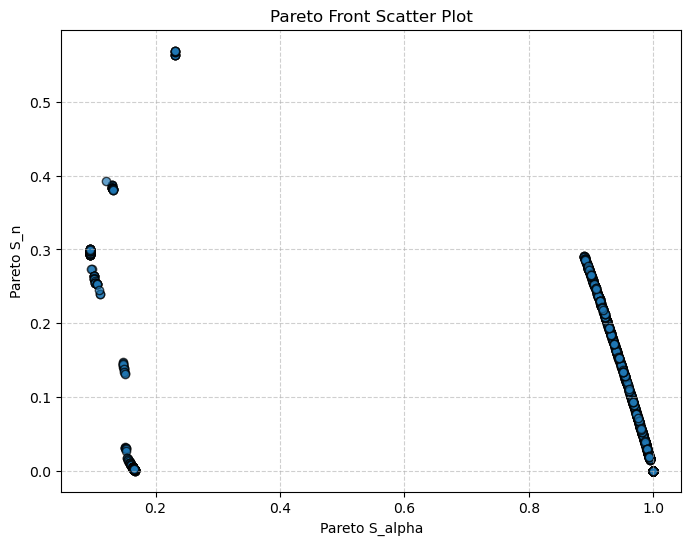

In [14]:
# Extract columns
x_5runs = total_paretofront[:, 0]  # First column
y_5runs = total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_5runs, y_5runs, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

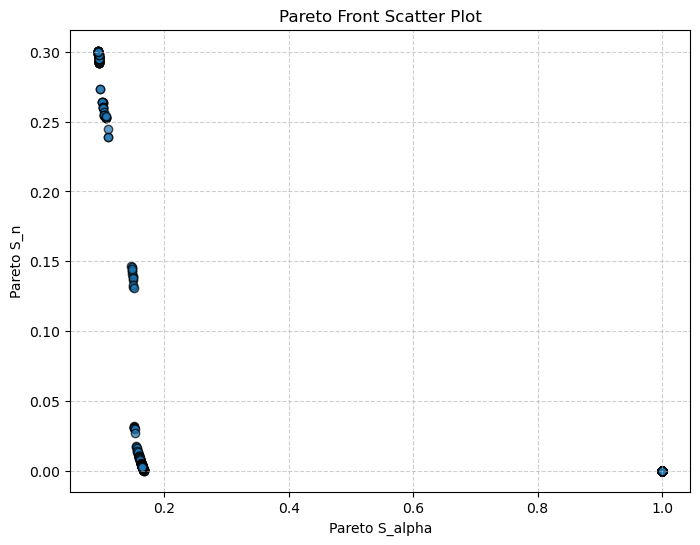

In [15]:
# Extract columns
x_5runs = filtered_total_paretofront[:, 0]  # First column
y_5runs = filtered_total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_5runs, y_5runs, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

10 runs

In [16]:
# Initialize an empty array for storing Pareto front values
total_paretofront = np.empty((0, 2))

# Loop through runs
for run in range(1, 10 + 1):
    # Load the parameter values for that run's Pareto front
    pareto_Salpha = np.load(f"pareto_Salpha_run{run}.npy", allow_pickle=True)
    pareto_Sn = np.load(f"pareto_Sn_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_Salpha, pareto_Sn))

    # Append to the total Pareto front
    total_paretofront = np.vstack((total_paretofront, pareto_front))

# Now, total_paretofront contains all runs stacked together
np.shape(total_paretofront)

(3652, 2)

In [17]:
mask2 = paretoset(total_paretofront, sense=["min", "min"])
filtered_total_paretofront = total_paretofront[mask2]

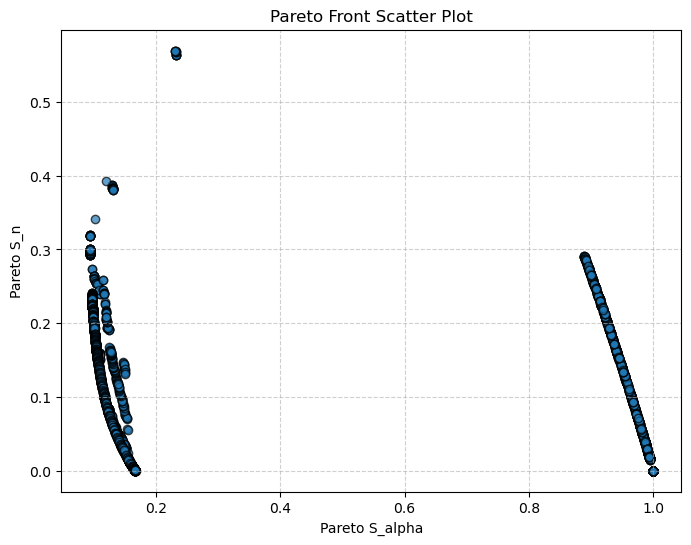

In [18]:
# Extract columns
x_10runs = total_paretofront[:, 0]  # First column
y_10runs = total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_10runs, y_10runs, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

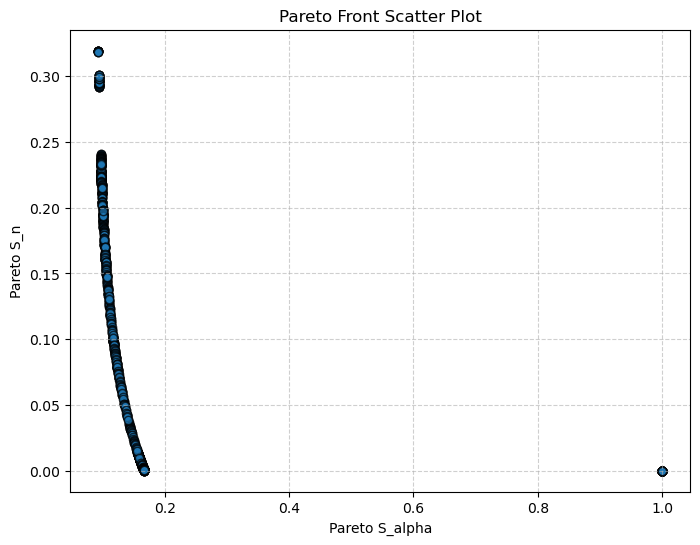

In [19]:
# Extract columns
x_10runs = filtered_total_paretofront[:, 0]  # First column
y_10runs = filtered_total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_10runs, y_10runs, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

Comparison

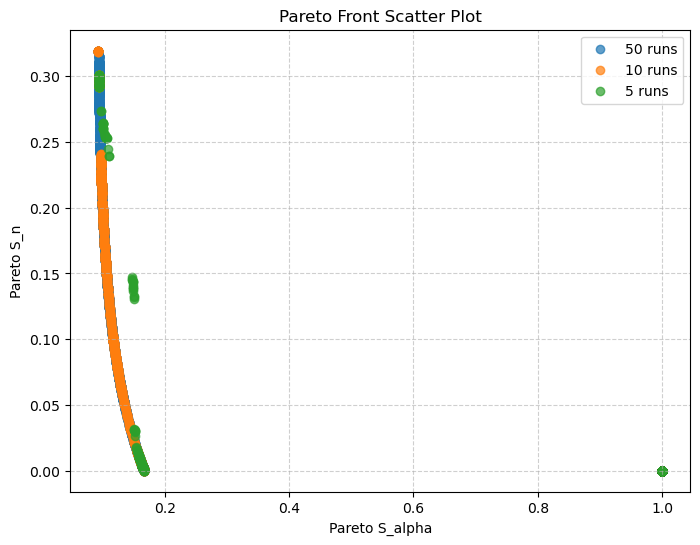

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_50runs, y_50runs, alpha=0.7, label="50 runs")
plt.scatter(x_10runs, y_10runs, alpha=0.7, label="10 runs")
plt.scatter(x_5runs, y_5runs, alpha=0.7, label="5 runs")

plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()


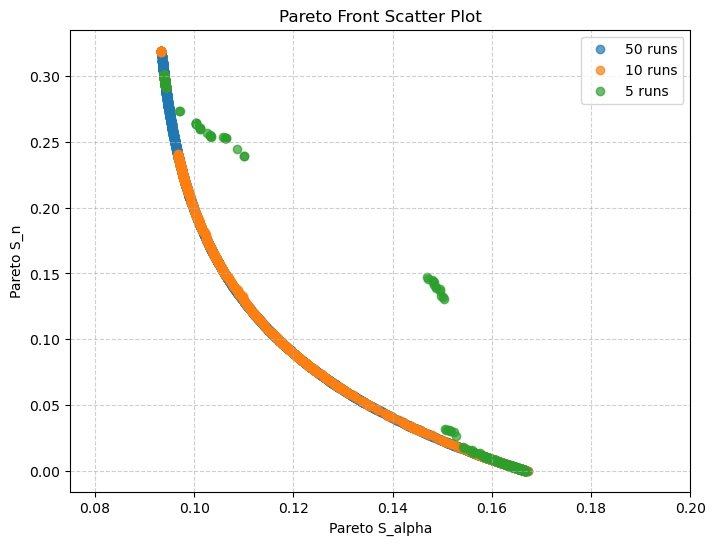

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(x_50runs, y_50runs, alpha=0.7, label="50 runs")
plt.scatter(x_10runs, y_10runs, alpha=0.7, label="10 runs")
plt.scatter(x_5runs, y_5runs, alpha=0.7, label="5 runs")

plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.xlim(0.075, 0.2)

plt.show()

In [ ]:
os.chdir("../..")
print(os.getcwd())  # Verify the current working directory

/home/DREXEL/nt625/Desktop/NAM/WTFFFF


In [25]:
pareto_Sens = np.load('ARneg_SensitivityPareto_COPY.npy')

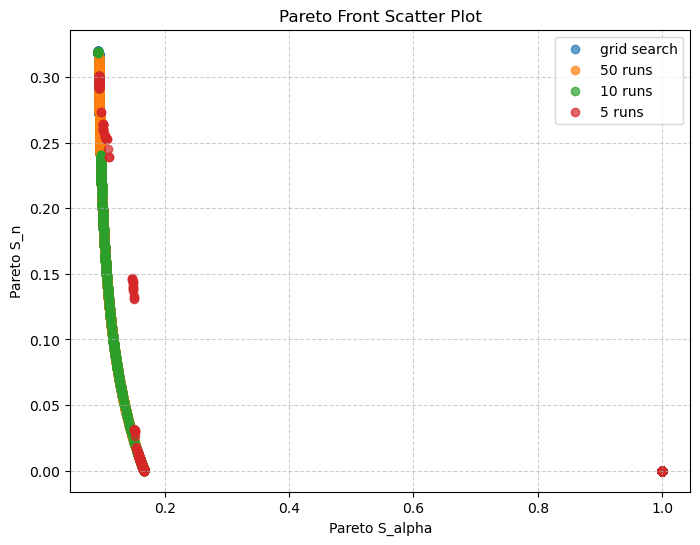

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(pareto_Sens[:,0], pareto_Sens[:,1], alpha=0.7, label="grid search")
plt.scatter(x_50runs, y_50runs, alpha=0.7, label="50 runs")
plt.scatter(x_10runs, y_10runs, alpha=0.7, label="10 runs")
plt.scatter(x_5runs, y_5runs, alpha=0.7, label="5 runs")

plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

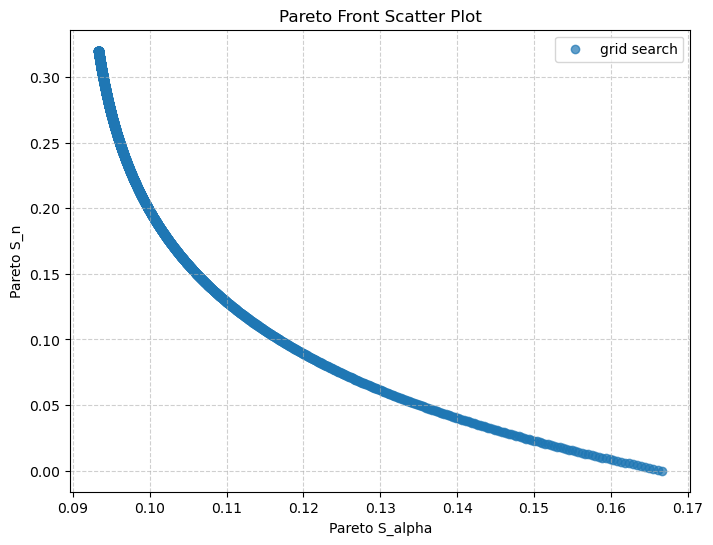

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(pareto_Sens[:,0], pareto_Sens[:,1], alpha=0.7, label="grid search")

plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

In [53]:
dummy = np.column_stack([x_50runs,y_50runs])

In [54]:
np.sort(dummy)

array([[0.0942107 , 0.29191569],
       [0.09420309, 0.29212896],
       [0.09414829, 0.29334689],
       ...,
       [0.0021446 , 0.16490233],
       [0.00213881, 0.16490825],
       [0.00213947, 0.16490652]])

In [56]:
# Get the row indices that would sort the array by the second column
sorted_indices = dummy[:, 1].argsort()

# Sort the array using these indices
sorted_dummy = dummy[sorted_indices]

sorted_dummy

array([[1.00000000e+00, 1.16798119e-12],
       [1.00000000e+00, 1.20930053e-12],
       [1.00000000e+00, 1.21760384e-12],
       ...,
       [9.33540659e-02, 3.19274348e-01],
       [9.33538781e-02, 3.19281418e-01],
       [9.33494261e-02, 3.19322210e-01]])